# Non LLM Based Workflow

## BMI Calculator

{'weight': 70, 'height': 1.75, 'bmi': 22.86, 'category': 'Normal weight'}


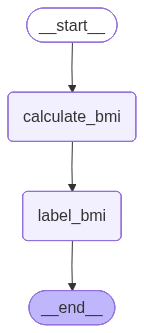

In [ ]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

from IPython.display import Image

# Define a State
class BMIState(TypedDict):
    weight: float  # in kilograms
    height: float  # in meters
    bmi: float     # Body Mass Index
    category: str  # BMI Category

# Define Tasks -> functions
def calculate_bmi(state: BMIState) -> BMIState:
    weight = state["weight"]
    height = state["height"]
    # calculate bmi
    bmi = weight / (height ** 2) if height > 0 else 0
    state['bmi'] = round(bmi, 2)
    return state

def label_bmi(state: BMIState) -> BMIState:
    bmi = state["bmi"]
    if bmi < 18.5:
        category = "Underweight"
    elif 18.5 <= bmi < 24.9:
        category = "Normal weight"
    elif 25 <= bmi < 29.9:
        category = "Overweight"
    else:
        category = "Obesity"
    state['category'] = category
    return state

# Define the graph
graph = StateGraph(BMIState)

# Add nodes to graph
graph.add_node('calculate_bmi', calculate_bmi)
graph.add_node('label_bmi', label_bmi)

# Add edges to graph
# START -> calculate_bmi -> label_bmi -> END
graph.add_edge(START, 'calculate_bmi')
graph.add_edge('calculate_bmi', 'label_bmi')
graph.add_edge('label_bmi', END)

# Compile the graph
seq_workflow = graph.compile()

# Display the graph
display(seq_workflow)

# Execute the graph
initial_state = {"weight": 70, "height": 1.75}
final_state = seq_workflow.invoke(initial_state)
print(final_state)

# Display the graph
#display(Image(seq_workflow.get_graph().draw_mermaid_png()))

# LLM Based Workflow

## Basic Q & A

{'question': 'How far is sun from the earth', 'answer': 'The average distance from the Sun to the Earth is approximately 93 million miles (150 million kilometers).'}


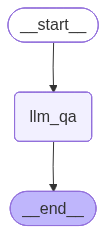

In [ ]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv

load_dotenv()

model = ChatOpenAI()

# Define a State
class LLMState(TypedDict):
    question: str
    answer: str

# Define Tasks -> functions
def llm_qa(state: LLMState) -> LLMState:
    # extract question from state
    question = state['question']

    # form a prompt
    prompt = f'Answer the following question: {question}'

    # Ask qs to the LLM 
    answer = model.invoke(prompt).content

    # Update the answer in the sate
    state['answer'] = answer
    return state

# Define the graph
graph = StateGraph(LLMState)

# Add nodes to graph
graph.add_node('llm_qa',llm_qa)

# Add edges to graph
# START -> llm_qa -> END
graph.add_edge(START, 'llm_qa')
graph.add_edge('llm_qa', END)

# Compile the graph
seq_workflow = graph.compile()

# Display the graph
display(seq_workflow)

# Execute the graph
initial_state = {'question': 'How far is sun from the earth'}
final_state = seq_workflow.invoke(initial_state)
print(final_state)

# Display the graph
#display(Image(seq_workflow.get_graph().draw_mermaid_png()))

## Prompt Chaining

### Write Blog.  

topic -> (topic) LLM (outline) -> (topic + outline) LLM (blog) -> blog.   
START -> generate_outline -> generate_topic -> END

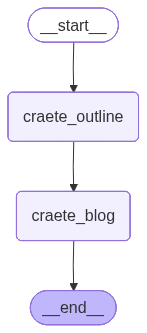

AI Bots having their own social network.
I. Introduction
   A. Definition of AI bots
   B. Explanation of social networks
   C. Introduction of the concept of AI bots having their own social network

II. The Evolution of AI Bots
   A. History of AI bots
   B. Purpose of AI bots in the digital world
   C. Current uses of AI bots in various industries

III. The Need for AI Bots to Have Their Own Social Network
   A. Challenges faced by AI bots in interacting with humans on existing social networks
   B. Benefits of AI bots having a dedicated platform for communication and collaboration
   C. Potential applications and advantages of AI bots having their own social network

IV. Features of AI Bots Social Network
   A. Customized profiles for AI bots
   B. Communication tools for AI bots to interact with each other
   C. Data sharing capabilities to enhance AI bot learning and development
   D. Security measures to protect AI bots from malicious activities

V. Implementation of AI Bots Soci

In [ ]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv

load_dotenv()

# Instantiate Model Object
model = ChatOpenAI()

# Define a State
class BlogState(TypedDict):
    title: str
    outline: str
    blog: str

# Define Tasks -> functions
def create_outline(state: BlogState) -> BlogState:
    # fetch title
    title = state['title']

    # form a prompt
    prompt = f'Generate a detailed outline for a blog for the topic: {title}'

    # Ask qs to the LLM 
    outline = model.invoke(prompt).content

    # Update the andwer in the sate
    state['outline'] = outline
    return state

def create_blog(state: BlogState) -> BlogState:
    # fetch title
    title = state['title']
    outline = state['outline']

    # form a prompt
    prompt = f'Write a detailed blog on the title - {title} using the following outline \n {outline}'

    # Ask qs to the LLM 
    blog = model.invoke(prompt).content

    # Update the andwer in the sate
    state['blog'] = blog
    return state

# Define the graph
graph = StateGraph(BlogState)

# Add nodes to graph
graph.add_node('create_outline',create_outline)
graph.add_node('create_blog',create_blog)

# Add edges to graph
# START -> craete_outline -> craete_blog -> END
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', END)

# Compile the graph
seq_workflow = graph.compile()

# Display the graph
display(seq_workflow)

# Execute the graph
initial_state = {'title': 'AI Bots owing social network.'}
final_state = seq_workflow.invoke(initial_state)

# Display the graph
# display(Image(seq_workflow.get_graph().draw_mermaid_png()))

print(final_state['title'])
print(final_state['outline'])
print(final_state['blog'])